In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import *
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
df = df.drop(columns = ['Unnamed: 0','key'],axis = 1)

In [11]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
def distance_transform (longitude1,latitude1,longitude2,latitude2):
    distance = []
    for pos in range(len(longitude1)):
        long1,lat1,long2,lat2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dlon = long2-long1
        dlat = lat2-lat1

        a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        c = 2*asin(np.sqrt(a)) * 6371
        distance.append(c)
    return distance

In [13]:
df['distance_km'] = distance_transform(df['pickup_longitude'].to_numpy(),df['pickup_latitude'].to_numpy(),
                                      df['dropoff_longitude'].to_numpy(),df['dropoff_latitude'].to_numpy())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
 7   distance_km        199999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.7+ MB


In [15]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [16]:
df['month'] = df['pickup_datetime'].str[5:7]
df['hour'] = df['pickup_datetime'].str[11:13]
df['year'] = df['pickup_datetime'].str[0:4]

In [17]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,month,hour,year
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,05,19,2015
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,07,20,2009
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,08,21,2009
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,06,08,2009
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,08,17,2014
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,10,10,2012
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,03,01,2014
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,06,00,2009
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,05,14,2015


fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
distance_km             Axes(0.125,0.374;0.352273x0.11)
dtype: object

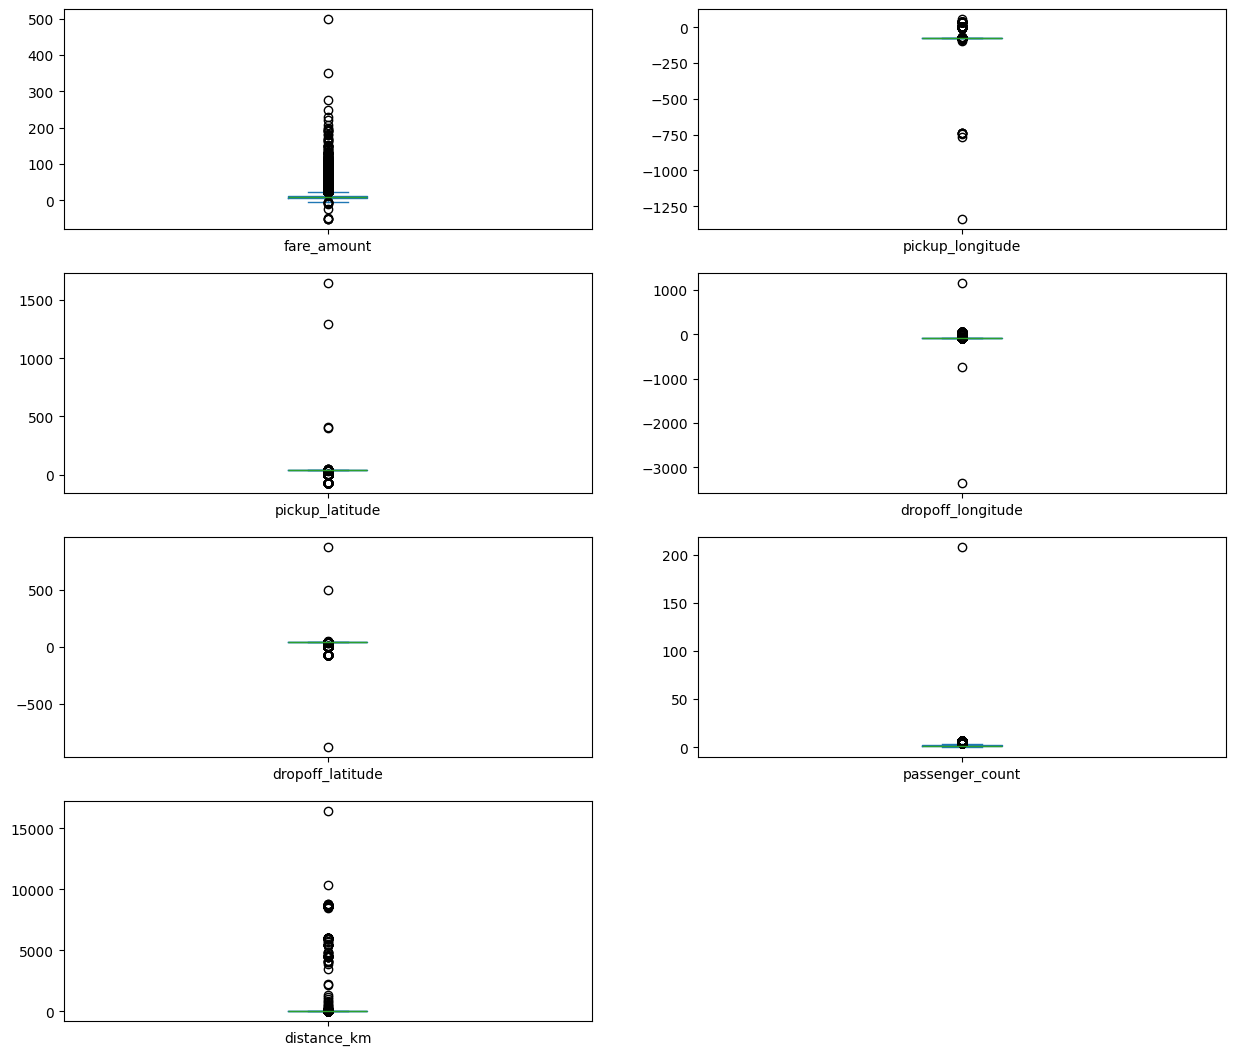

In [18]:
df.plot(kind = 'box',subplots = True,layout = (6,2),figsize = (15,20))

In [19]:
def find_outlier(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5 *IQR)))]
    return outliers

def remove_Outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    return np.clip(df[col],Q1-1.5*IQR,Q3+1.5*IQR)
cols = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance_km']

for col in cols:
    df[col]=remove_Outliers(df,col)

In [20]:
outliers = find_outlier(df['fare_amount'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers

number of outliers:0
max outlier value:nan
min outlier value:nan


Series([], Name: fare_amount, dtype: float64)

fare_amount              Axes(0.125,0.77;0.352273x0.11)
pickup_longitude      Axes(0.547727,0.77;0.352273x0.11)
pickup_latitude         Axes(0.125,0.638;0.352273x0.11)
dropoff_longitude    Axes(0.547727,0.638;0.352273x0.11)
dropoff_latitude        Axes(0.125,0.506;0.352273x0.11)
passenger_count      Axes(0.547727,0.506;0.352273x0.11)
distance_km             Axes(0.125,0.374;0.352273x0.11)
dtype: object

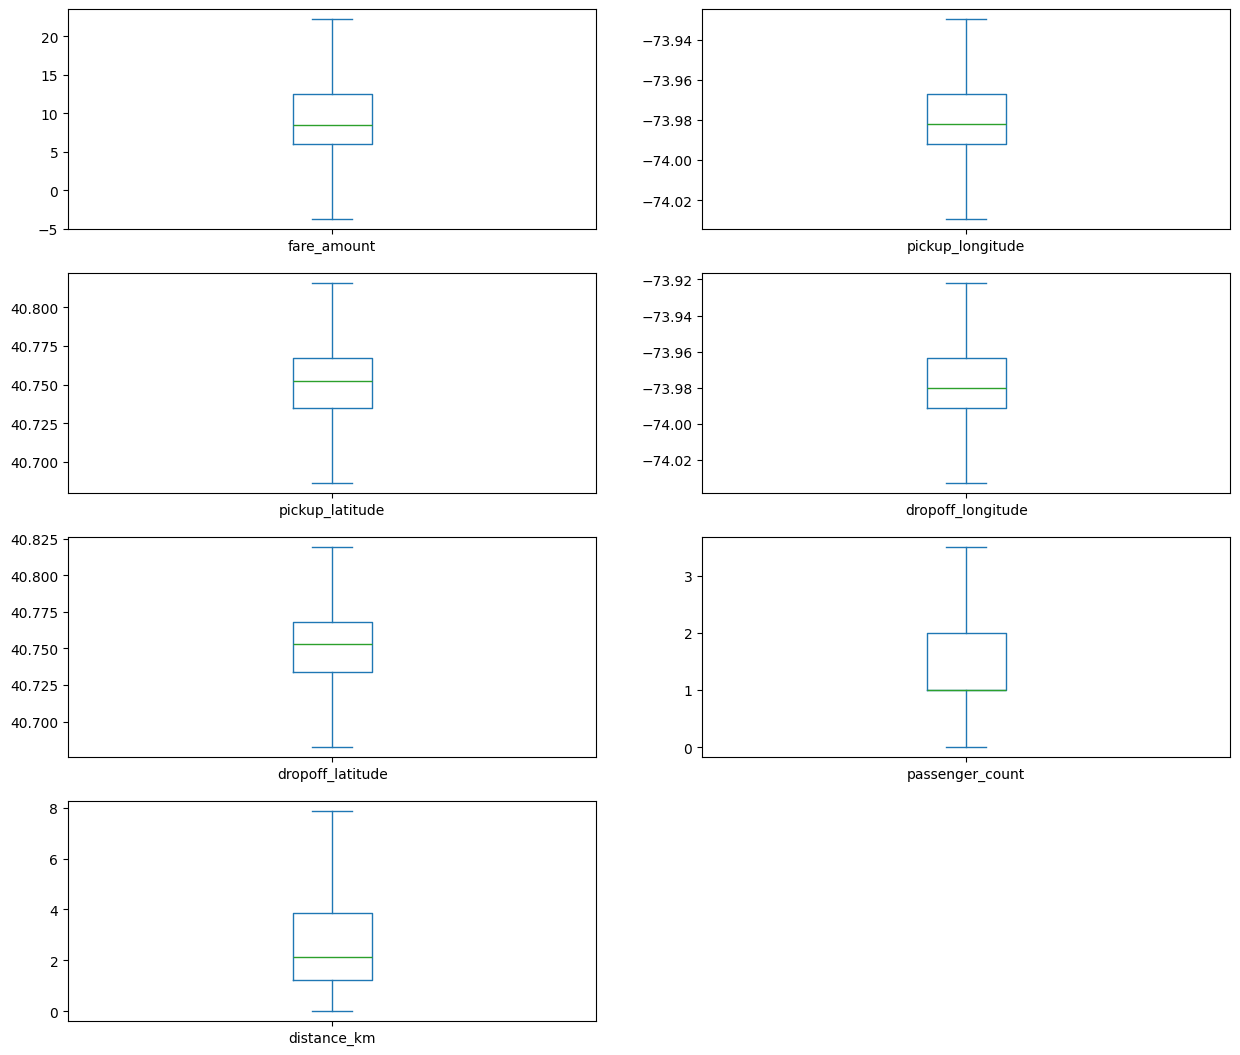

In [21]:
df.plot(kind = 'box',subplots = True,layout = (6,2),figsize = (15,20))

In [22]:
x = df[['distance_km','year']]
y = df['fare_amount']

In [23]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,train_size = 0.3,random_state = 42)

In [25]:
Linear_Regression = LinearRegression()

In [26]:
Linear_Regression.fit(xtrain,ytrain)

LinearRegression()

In [27]:
y_pred = Linear_Regression.predict(xtest)

In [28]:
print("R2_Score is : " , metrics.r2_score(ytest,y_pred))
print("RMSE is : " , np.sqrt(metrics.mean_squared_error(ytest,y_pred)))

R2_Score is :  0.7243446155160619
RMSE is :  2.8578979273752747


<Axes: xlabel='fare_amount'>

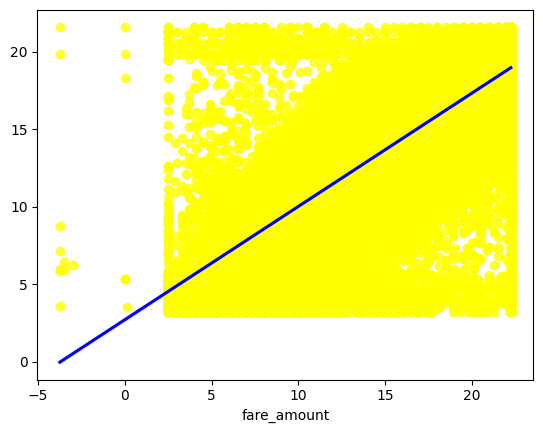

In [30]:
sns.regplot(x=ytest,y=y_pred,color = "yellow",line_kws = {"color":"blue"})

In [32]:
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

In [33]:
ypred = rfr.predict(xtest)

In [34]:
print("R2_Score is : " , metrics.r2_score(ytest,y_pred))
print("RMSE is : " , np.sqrt(metrics.mean_squared_error(ytest,y_pred)))

R2_Score is :  0.7243446155160619
RMSE is :  2.8578979273752747


In [ ]:
sns.regplot(x=ytest,y=y_pred,color = "yellow",line_kws = {"color":"blue"})